# Libraries

In [113]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
import os
import matplotlib.pyplot as plt

# 1. Load Data

In [36]:
df = pd.read_csv('/Users/krieger/Desktop/NLP/spam_cnn.csv', encoding = 'ISO-8859-1')
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
df.columns = ['labels', 'data']

In [38]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# Here we create a new column to map the labels into numbers
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1}) 
y = df['b_labels'].values

# Train Test split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)
 

In [92]:
# Convert sentences to sequence
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

In [99]:
# Checking the number of words in our vocabulary.
# So all the words that are unique
V = len(tokenizer.word_index)

## Pad Sequences

In [94]:
# pad sequences
# The entire objective for padding sequences is to get the 
# same length for every single observation 
data_train = pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [95]:
len(data_train[2])

189

In [96]:
# Set the value of T to get the sequence length
T = data_train.shape[1]
print(T)

189


In [97]:
# pad the test with the T value from data_train sequence
# In this case it is 189 
data_test = pad_sequences(sequences_test, maxlen= T)
data_test.shape

(1839, 189)

# 2. Build the model

In [110]:
# Create the model

# Choose embedding dimensionality
D = 20

# Input layer 
i = Input(shape=(T,)) 
# input layer takes in sequences of integers,
# sp shape is T

# Embedding layer
x = Embedding(V + 1, D)(i)
# This takes in sequences of integers and returns sequences
# of word vectors 
# This will be an N * D array
# We want the size of an embedding to (V + 1) x D, because first word 
# index starts from 1 and not 0


# First CNN layer 
x = Conv1D(32, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)


# Second CNN layer
x = Conv1D(64, 3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN layer
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation = 'sigmoid')(x) # sigmoid bc we're dealing with binary classification

model = Model(i, x)

In [111]:
# compile the model 
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [112]:
# train the model 
r = model.fit(x = data_train, y = y_train, epochs = 5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 1s 11ms/step - loss: 0.3822 - accuracy: 0.8674 - val_loss: 0.3120 - val_accuracy: 0.8515
Epoch 2/5
117/117 [==============================] - 1s 9ms/step - loss: 0.1362 - accuracy: 0.9405 - val_loss: 0.0924 - val_accuracy: 0.9717
Epoch 3/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0227 - accuracy: 0.9930 - val_loss: 0.1145 - val_accuracy: 0.9701
Epoch 4/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0062 - accuracy: 0.9992 - val_loss: 0.0753 - val_accuracy: 0.9831
Epoch 5/5
117/117 [==============================] - 1s 9ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0843 - val_accuracy: 0.9826


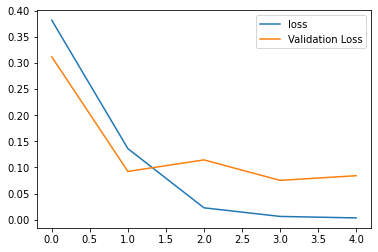

In [116]:
# Loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()


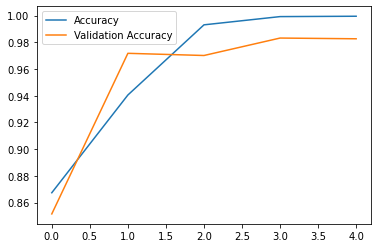

In [118]:
# Accurcacy per iteration
plt.plot(r.history['accuracy'], label= 'Accuracy')
plt.plot(r.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend()
plt.show()